In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
linreg = linear_model.LinearRegression()

X = np.array([2, 1, 5, 4, 7, 6, 8, 9, 3, 11, 0, 14, 25, 10, 23, 16, 52])
Y = np.array([4, 2, 5, 1, 14, 8, 7, 4, 21, 23, 15, 26, 50, 12, 45, 14, 67])

Iter : 0, T0 : 0.018705882352941176, T1 : 0.4158823529411765, cost_func : -415.88235294117646
Iter : 10, T0 : 0.0774004987976532, T1 : 1.4277616224605694, cost_func : -14.706828465822742
Iter : 20, T0 : 0.09618266404634739, T1 : 1.4630299913405327, cost_func : -0.45457379754411503
Iter : 30, T0 : 0.11345858805358724, T1 : 1.463605775289369, cost_func : 0.051408889474901916
Iter : 40, T0 : 0.13059319990107252, T1 : 1.4629526111521092, cost_func : 0.06902786210949496
Iter : 50, T0 : 0.1476354557470825, T1 : 1.4622593470306813, cost_func : 0.06929856082456688
Iter : 60, T0 : 0.16458755655314622, T1 : 1.4615682004630366, cost_func : 0.06895480313460546
Iter : 70, T0 : 0.1814500397620993, T1 : 1.4608806525918057, cost_func : 0.06859108364698292


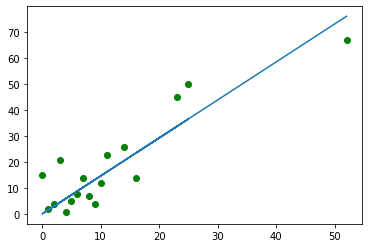

array([[0.12875723]])

In [2]:
class LinearRegression:
    def __init__(self, alpha, X, Y, T0=0, T1=0):
        self.T0 = T0
        self.T1 = T1
        self.alpha = alpha
        self.X = X
        self.Y = Y

    def J_for_intercept(self):
        n = len(self.X)
        summ = 0
        for i in range(n):
            summ += (self.T0 + self.T1*self.X[i] - self.Y[i])
        return (1/n)*summ

    def J(self):
        n = len(self.X)
        summ = 0
        for i in range(n):
            summ += (self.T0 + self.T1*self.X[i] - self.Y[i])*self.X[i] 
        return (1/n)*summ

    def regression(self):
        for i in range(80):
            cost_for_intercept = LinearRegression.J_for_intercept(self)
            cost = LinearRegression.J(self)
            self.T0 -= self.alpha*cost_for_intercept
            self.T1 -= self.alpha*cost
            if i%10==0:
                print(f"Iter : {i}, T0 : {self.T0}, T1 : {self.T1}, cost_func : {cost}")
        return self

test1 = LinearRegression(1e-3, X, Y)
res1 = test1.regression()
prediction1 = res1.T0 + res1.T1*X

plt.plot(X,Y,'go')
plt.plot(X,prediction1)
plt.show()

linreg.fit(X.reshape(-1,1), Y.reshape(-1,1))
deviation = res1.T1 - linreg.coef_
deviation

Iter : 0, T0 : 0.18, T1 : 3.4, cost_func : -3400.0
Iter : 10, T0 : 0.8289060986462559, T1 : 16.727223740649094, cost_func : -464.6052199979885
Iter : 20, T0 : 0.8375714749277422, T1 : 18.551072208075166, cost_func : -63.87089609542266
Iter : 30, T0 : 0.7591862830947023, T1 : 18.804490550531693, cost_func : -9.161739167591481
Iter : 40, T0 : 0.6692690207881892, T1 : 18.843498320516336, cost_func : -1.6910337998966467
Iter : 50, T0 : 0.5781277182444619, T1 : 18.85321581638581, cost_func : -0.669205857084718
Iter : 60, T0 : 0.4871680516147153, T1 : 18.85891525913191, cost_func : -0.5277702554575948
Iter : 70, T0 : 0.39658037800688906, T1 : 18.864046831571677, cost_func : -0.5065320647009509


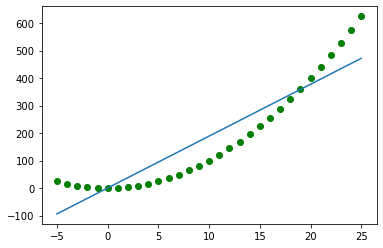

In [3]:
arr1 = np.arange(-5,26,1)
arr2 = arr1**2

test2 = LinearRegression(1e-3, arr1, arr2)
res2 = test2.regression()
prediction2 = res2.T0 + res2.T1*arr1

plt.plot(arr1,arr2,"go")
plt.plot(arr1,prediction2)
plt.show()

Iter: 0, T0: 0.018000000000000002, T1: 0.34, T2: 0.34, cost: -3400.0
Iter: 10, T0: 0.04950129703672964, T1: 0.942336236680986, T2: 0.942336236680986, cost: -40.40955494460537
Iter: 20, T0: 0.049411105052823805, T1: 0.9494961690529619, T2: 0.9494961690529619, cost: -0.48155632672177445
Iter: 30, T0: 0.04894567306395818, T1: 0.9495825605491999, T2: 0.9495825605491999, cost: -0.007020182984870042
Iter: 40, T0: 0.04847599926335301, T1: 0.9495848839499028, T2: 0.9495848839499028, cost: -0.0013798162284501814
Iter: 50, T0: 0.04800649278124495, T1: 0.9495862076114, T2: 0.9495862076114, cost: -0.0013121735628264133
Iter: 60, T0: 0.047537205917044016, T1: 0.9495875187832322, T2: 0.9495875187832322, cost: -0.0013107617896491407
Iter: 70, T0: 0.04706813919022621, T1: 0.9495888291989298, T2: 0.9495888291989298, cost: -0.0013101374420330103
Iter: 80, T0: 0.04659929250492226, T1: 0.9495901389982284, T2: 0.9495901389982284, cost: -0.0013095227367000094


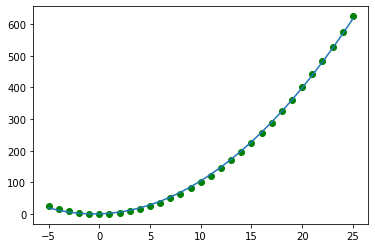

In [4]:
class PolynomialRegression:
    def __init__(self, alpha, X, Y, T0=0, T1=0, T2=0):
        self.T0 = T0
        self.T1 = T1
        self.T2 = T2
        self.alpha = alpha
        self.X = X
        self.Y = Y
        
    def J_for_intercept(self):
        n = len(self.X)
        summ = 0
        for i in range(n):
            summ += (self.T0 + self.T1*self.X[i] + self.T2*(self.X[i])**2) - self.Y[i]
        return (1/n)*summ

    def J(self):
        n = len(self.X)
        summ = 0
        for i in range(n):
            summ += ((self.T0 + self.T1*self.X[i] + self.T2*(self.X[i])**2)  - self.Y[i])*self.X[i] 
        return (1/n)*summ

    def regression(self):
        for i in range(90):
            cost_for_intercept = PolynomialRegression.J_for_intercept(self)
            cost = PolynomialRegression.J(self)
            self.T0 -= self.alpha*cost_for_intercept
            self.T1 -= self.alpha*cost
            self.T2 -= self.alpha*cost
            if i%10==0:
                print(f"Iter: {i}, T0: {self.T0}, T1: {self.T1}, T2: {self.T2}, cost: {cost}")
        return self

test2 = PolynomialRegression(1e-4, arr1, arr2)
result = test2.regression()
prediction2 = result.T0 + result.T1*arr1 + result.T2*((arr1)**2)

plt.plot(arr1, arr2, "go")
plt.plot(arr1, prediction2)
plt.show()